# Simple Example for the Pixel Prediction Challenge

First show the data files, you should see four lines.

In [108]:
import numpy as np # linear algebra
import numpy as np
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('C:/Users/doad224/Downloads/roxie'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/doad224/Downloads/roxie\roxie_full_features.csv
C:/Users/doad224/Downloads/roxie\roxie_test_features.csv
C:/Users/doad224/Downloads/roxie\roxie_train_features.csv
C:/Users/doad224/Downloads/roxie\roxie_train_values.csv


# Load the data

Remove row ids as appropriate so they don't get used as features.

In [109]:
base_dir = 'C:/Users/doad224/Downloads/roxie/'

X_train = np.loadtxt(base_dir + "roxie_train_features.csv", delimiter=",")[:,1:]
X_test = np.loadtxt(base_dir + "roxie_test_features.csv", delimiter=",")
ids_test = X_test[:,(0,)]
X_test = X_test[:,1:]
y_train = np.loadtxt(base_dir + "roxie_train_values.csv", delimiter=",", ndmin=2)[:,(1,)]

In [110]:
X_train = X_train/255.
X_test = X_test/255.

In [111]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
sc = MinMaxScaler()
X_train_new = sc.fit_transform(X_train)
X_test_new= sc.fit_transform(X_test)

# Train Model

In [112]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X_train_new, y_train, test_size = 0.1, random_state = 42)

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
mdl = RandomForestRegressor(max_depth=0.00001, criterion='mse',random_state=400,n_estimators=1, bootstrap = False)
#mdl = KNeighborsRegressor(n_neighbors=2)
#mdl = DecisionTreeRegressor()
mdl.fit(xTrain, yTrain)
mdl.score(xTest, yTest)
# make predictions on test data
#y_pred = mdl.predict(X_test)

C:\Users\doad224\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


-0.00018947726045626112

In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
# train model
#mdl = KNeighborsRegressor(n_neighbors=2)
#mdl = DecisionTreeRegressor()
#mdl = RandomForestRegressor(max_depth=1, min_samples_split=250, min_samples_leaf=19,criterion='mse',random_state=0,n_estimators=1)

mdl.fit(X_train, y_train)

# make predictions on test data
y_pred = mdl.predict(X_test)

C:\Users\doad224\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


## Export predictions

In [115]:
output = np.concatenate((ids_test, y_pred[:,np.newaxis]), axis=1)
np.savetxt("submission_decision_tree.csv", output, delimiter=",", fmt='%1.4f', header='ID,intensity')

## Visualize the learned model

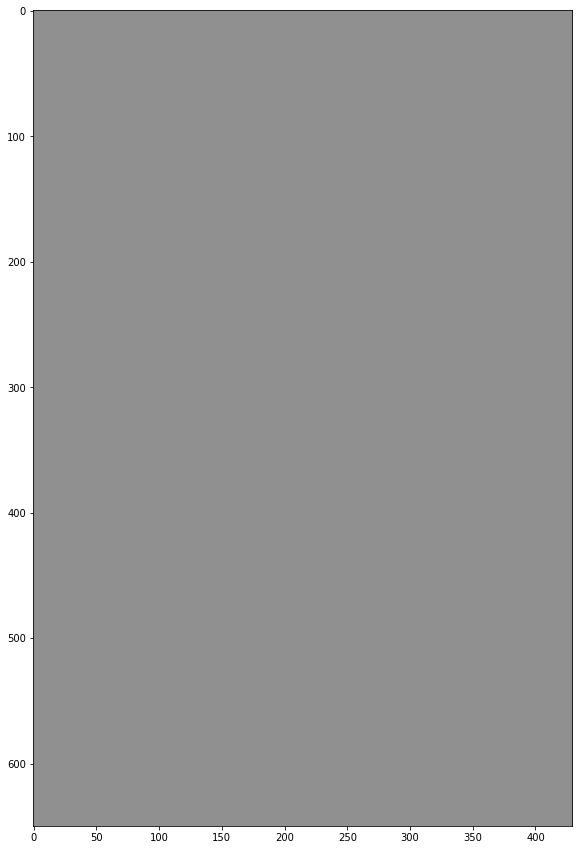

In [116]:
# this file contains all pixels (the union of the train and test sets)
X_full = np.loadtxt(base_dir + "roxie_full_features.csv", delimiter=",")

# make predictions for all pixels
y_pred = mdl.predict(X_full)

# show it as an image
plt.figure(figsize=(10,15))
plt.imshow(y_pred.reshape((650,430,3)));